#### Prepare a classification model using Naive Bayes for salary data. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### Importing training dataset.

In [5]:
# Importing data
forest_fire_df = pd.read_csv(r"forestfires.csv")

In [6]:
forest_fire_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
forest_fire_df.shape

(517, 31)

In [8]:
# Checking datatypes
forest_fire_df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [9]:
# Checking dupliacte values
forest_fire_df[forest_fire_df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
# Assuming you have a DataFrame called df
forest_fire_df = forest_fire_df.drop_duplicates()

In [11]:
# Checking dupliacte values
forest_fire_df[forest_fire_df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


In [12]:
# Reset the index
forest_fire_df.reset_index(drop=True, inplace=True)

In [13]:
forest_fire_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [14]:
# Finding Missing Values
nan_bool_df = forest_fire_df.isna()

# Use sum() to count the number of True values (NaN) in each column
nan_count_per_column = nan_bool_df.sum()

# If you want the total count of NaN values in the entire DataFrame, you can sum the nan_count_per_column
total_nan_count = nan_count_per_column.sum()

nan_count_per_column

total_nan_count

0

In [15]:
forest_fire_df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Print the names of all columns
print(forest_fire_df.columns)

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')


## From the dataframe and the columns name we can see that the categrical values are already converted into encoded values. So we need to drop the day and month column and also we need to drop column drop encoded month and day column to avoid dummy variable trap. 

### In the next step the dataframe is split into two dataframes namely continuous variable dataframe and categorical variable dataframe.

### Continuous variables dataframe will be checked for outliers, multicollinearity and kind of distribution each variable has. Based on the distribution either normalization or the standardization will be applied.

### Categorical variable dataframe will undergo one hot encoder and label encoder for the categorical variables.

### These dataframes will be mearged after these pre processing steps.

## Splitting of dataframe of the training dataset. 

In [17]:
# Dataframe to check the outliers for the continuous variable.

cont_df = forest_fire_df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area',]]
cat_df = forest_fire_df[['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'monthaug', 'monthdec', 'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct', 'monthsep', 'size_category']]

### Pre-processing of training continuous variable dataframe. 

In [18]:
cont_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Using Box Plot to detect the outliers

Indices of outliers from the box plots:
[3, 4, 7, 11, 12, 17, 22, 24, 40, 57, 74, 95, 96, 97, 102, 103, 108, 121, 128, 133, 136, 140, 145, 160, 163, 166, 169, 174, 179, 194, 197, 200, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 238, 240, 263, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 283, 290, 296, 300, 308, 316, 331, 333, 342, 361, 365, 366, 370, 371, 373, 375, 378, 379, 380, 382, 384, 386, 387, 388, 390, 391, 402, 403, 404, 406, 407, 411, 416, 417, 418, 425, 429, 435, 439, 443, 445, 446, 448, 452, 454, 456, 457, 458, 459, 463, 465, 467, 469, 473, 478, 479, 482, 487, 492, 493, 494, 495, 496, 497, 499, 501, 503, 504, 505, 506, 508]
151


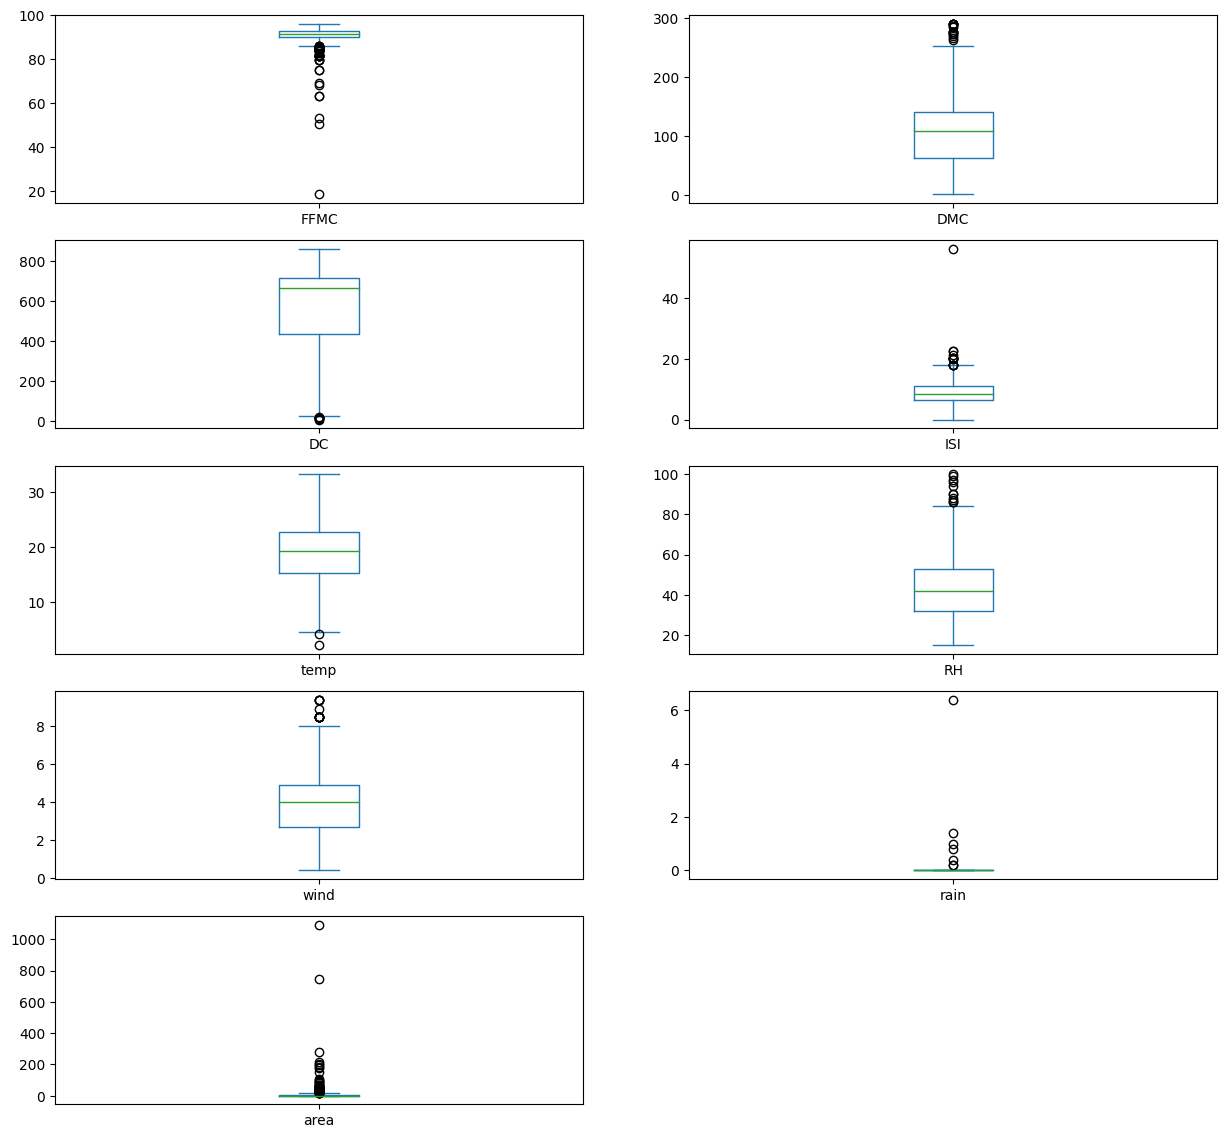

In [19]:
# Box plot find the outliers 

box_plot = cont_df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = cont_df.quantile(0.25)
Q3 = cont_df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(cont_df.columns, box_plot):
    outliers = ((cont_df[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (cont_df[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = cont_df.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

### Using IQR to detect the outliers

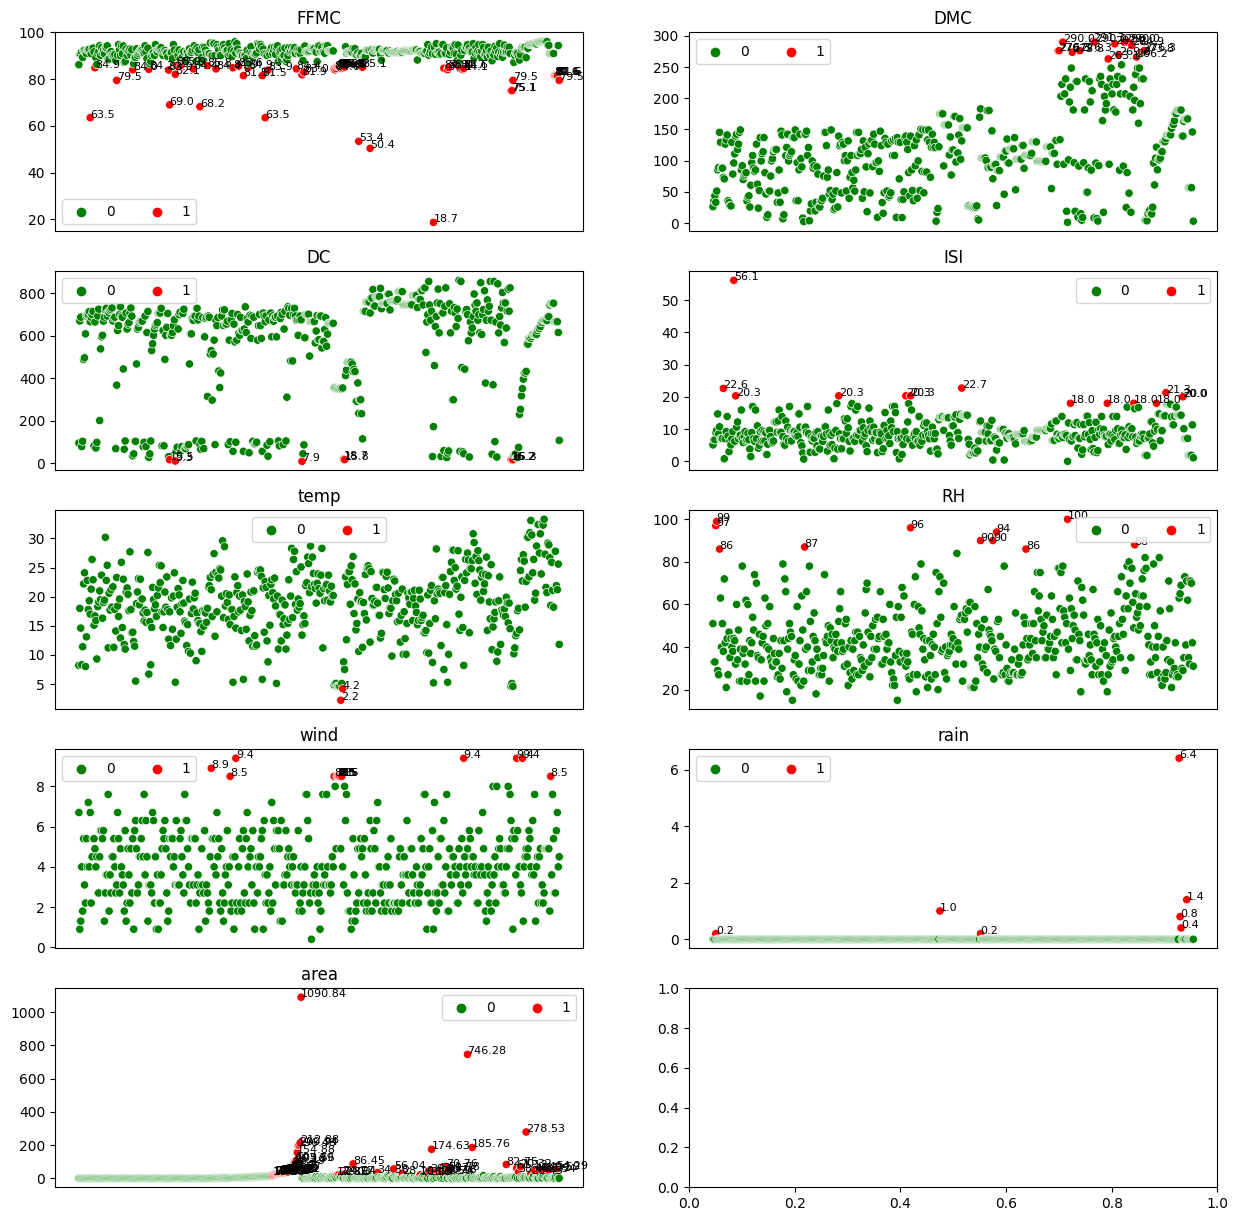

Row indices of potential outliers:
Int64Index([  3,   4,   7,  11,  12,  17,  22,  24,  40,  57,
            ...
            495, 496, 497, 499, 501, 503, 504, 505, 506, 508],
           dtype='int64', length=151)


In [20]:
#FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_
#SCATTER PLOTS HIGHLIGHTING OUTLIERS CALCULATED USING IQR METHOD
fig, ax = plt.subplots(5, 2, figsize=(15, 15))
row = col = 0
for n,i in enumerate(cont_df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(cont_df[i], 1.5)
   
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(cont_df[i])), y = cont_df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(cont_df[i])), y = cont_df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(cont_df[i]))[outliers == 1], cont_df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
plt.show()

# Calculate the IQR for each variable
Q1 = cont_df.quantile(0.25)
Q3 = cont_df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Identify potential outliers based on the IQR method
outliers = ((cont_df < (Q1 - IQR_multiplier * IQR)) | (cont_df > (Q3 + IQR_multiplier * IQR)))

# Get the row indices of potential outliers
row_indices = cont_df.index[outliers.any(axis=1)]

# Print the row indices of potential outliers
print("Row indices of potential outliers:")
print(row_indices)

### Using Z-Scores to detect the outliers

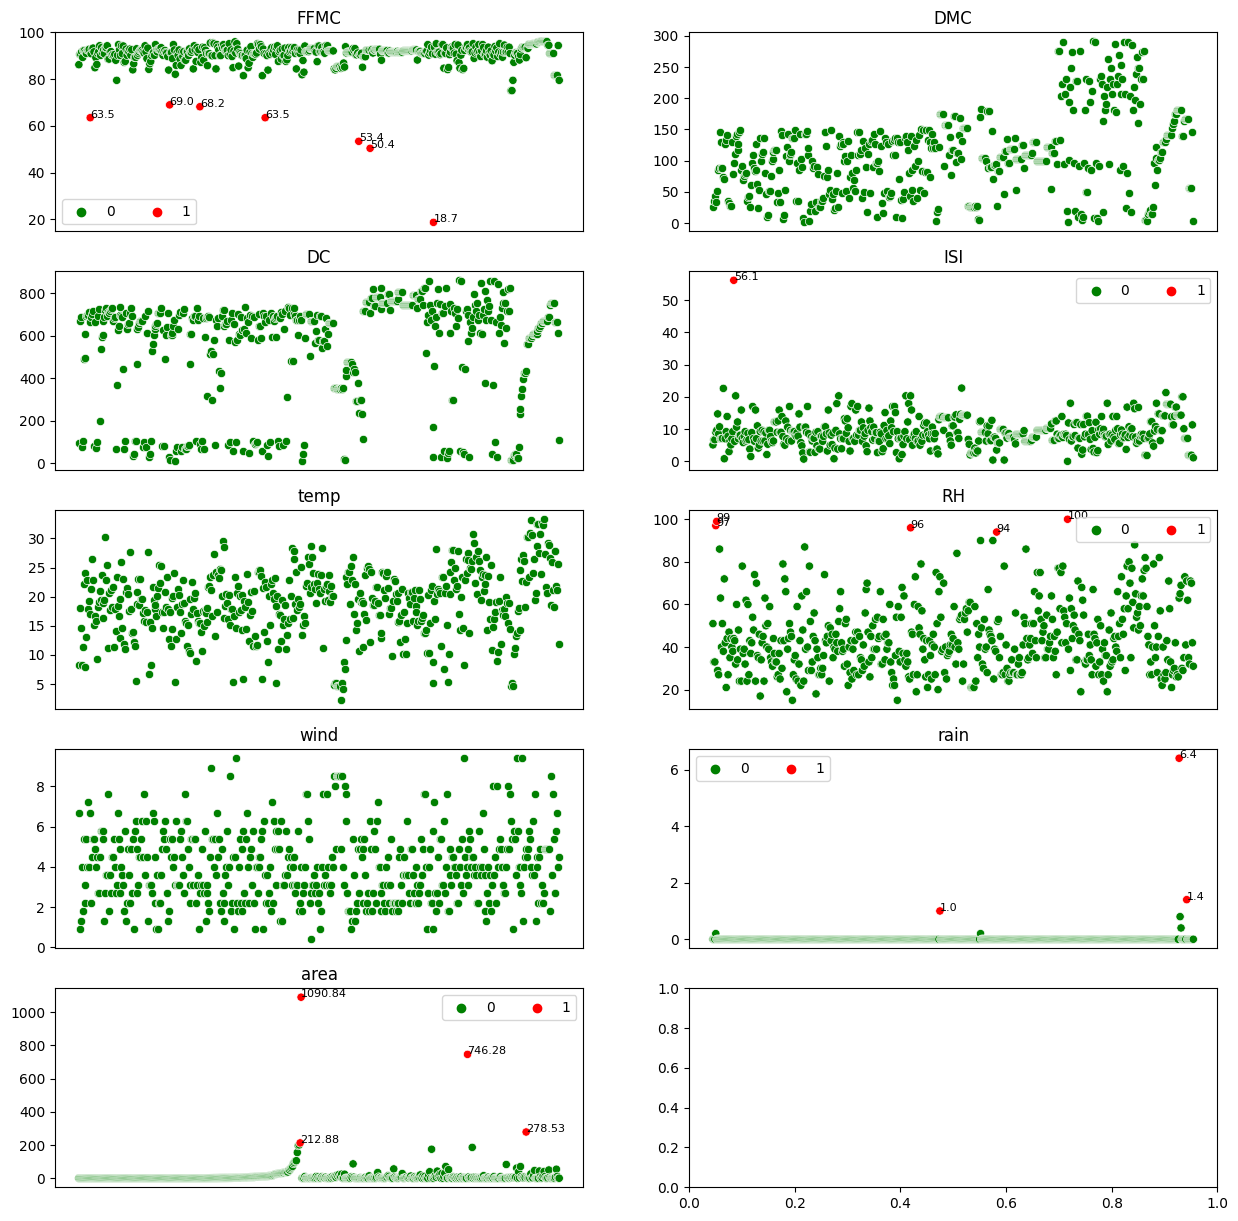

In [21]:
#FUNCTION TO DETECT OUTLIERS USING Z-SCORE METHOD
def zscore_outlier(x,lb,ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_
#PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
fig, ax = plt.subplots(5, 2, figsize=(15, 15))
row = col = 0
for n,i in enumerate(cont_df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(cont_df[i], -3, 3)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(cont_df[i])), y = cont_df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(cont_df[i])), y = cont_df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(cont_df[i]))[outliers == 1], cont_df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1

plt.show()


### Calculating the range for the continuous variable to check the outliers. 

In [22]:
cont_df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### Even though the outlier methods shows so many records as outliers, it is important to consider the domain knowleage to treat or change any records in the dataset.

#### We need to carefully consider each feature and we need to treat the outliers accordling.

#### 1. Feature FFMC has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 2. Feature DCM has outliers but none of the value is negative. The values range from 1 to 291 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 3. Feature DC has outliers but none of the value is negative. The values range from 7.9 to 860.6 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 4. Feature ISI has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 5. Feature temp has outliers but none of the value is negative. The values range from 2.2 to 33.3 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 6. Feature RH has outliers but none of the value is negative. The values range from 15 to 100 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 7. Feature wind has outliers but none of the value is negative. The values range from 0.4 to 9.4 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 8. Feature rain has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 9. Feature area has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.



In [23]:
# Create a copy of the DataFrame
cont_df1 = cont_df.copy()

In [24]:
cont_df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Manually finding the extreme outliers and replacing with the median value.

In [25]:
# Filter DataFrame to find records where previous duration is greater than the threshold
record1 = cont_df1[cont_df1["FFMC"] < 70]
record2 = cont_df1[cont_df1["ISI"] > 30]
record3 = cont_df1[cont_df1["rain"] > 4]
record4 = cont_df1[cont_df1["area"] > 600]
print(record1, record2, record3, record4)

     FFMC   DMC     DC  ISI  temp   RH  wind  rain   area
12   63.5  70.8  665.3  0.8  17.0   72   6.7   0.0   0.00
96   69.0   2.4   15.5  0.7  17.4   24   5.4   0.0   0.00
128  68.2  21.5   87.2  0.8  15.4   40   2.7   0.0   0.00
197  63.5  70.8  665.3  0.8  22.6   38   3.6   0.0  11.32
296  53.4  71.0  233.8  0.4  10.6   90   2.7   0.0   0.00
308  50.4  46.2  706.6  0.4  12.2   78   6.3   0.0   0.00
375  18.7   1.1  171.4  0.0   5.2  100   0.9   0.0   0.00     FFMC   DMC     DC   ISI  temp  RH  wind  rain  area
22  94.3  96.3  200.0  56.1  21.0  44   4.5   0.0   0.0      FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
493  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82      FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
235  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84
411  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28


In [26]:
import pandas as pd

# Create lists of indices from the filtered records
indices_record1 = record1.index.tolist()
indices_record2 = record2.index.tolist()
indices_record3 = record3.index.tolist()
indices_record4 = record4.index.tolist()

# Calculate the median values for the columns used for filtering
median_ffmc = cont_df1["FFMC"].median()
median_isi = cont_df1["ISI"].median()
median_rain = cont_df1["rain"].median()
median_area = cont_df1["area"].median()

# Replace values in the original DataFrame at specified indices with the respective median values
cont_df1.loc[indices_record1, "FFMC"] = median_ffmc
cont_df1.loc[indices_record2, "ISI"] = median_isi
cont_df1.loc[indices_record3, "rain"] = median_rain
cont_df1.loc[indices_record4, "area"] = median_area

In [27]:
# Filter DataFrame to find records where previous duration is greater than the threshold
record1 = cont_df1[cont_df1["FFMC"] < 70]
record2 = cont_df1[cont_df1["ISI"] > 30]
record3 = cont_df1[cont_df1["rain"] > 4]
record4 = cont_df1[cont_df1["area"] > 600]
print(record1, record2, record3, record4)

Empty DataFrame
Columns: [FFMC, DMC, DC, ISI, temp, RH, wind, rain, area]
Index: [] Empty DataFrame
Columns: [FFMC, DMC, DC, ISI, temp, RH, wind, rain, area]
Index: [] Empty DataFrame
Columns: [FFMC, DMC, DC, ISI, temp, RH, wind, rain, area]
Index: [] Empty DataFrame
Columns: [FFMC, DMC, DC, ISI, temp, RH, wind, rain, area]
Index: []


In [28]:
cont_df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Calculating the range for the continuous variable after outlier treatment.

In [29]:
cont_df1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,91.118075,110.235756,547.787623,8.929862,18.865422,44.253438,4.011395,0.007859,9.386031
std,3.119274,63.804112,248.196222,4.080732,5.841083,16.365192,1.800926,0.086586,27.481881
min,75.100000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.300000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.540000
max,96.200000,291.300000,860.600000,22.700000,33.300000,100.000000,9.400000,1.400000,278.530000


In [30]:
cont_df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Z scores after outlier treatment.

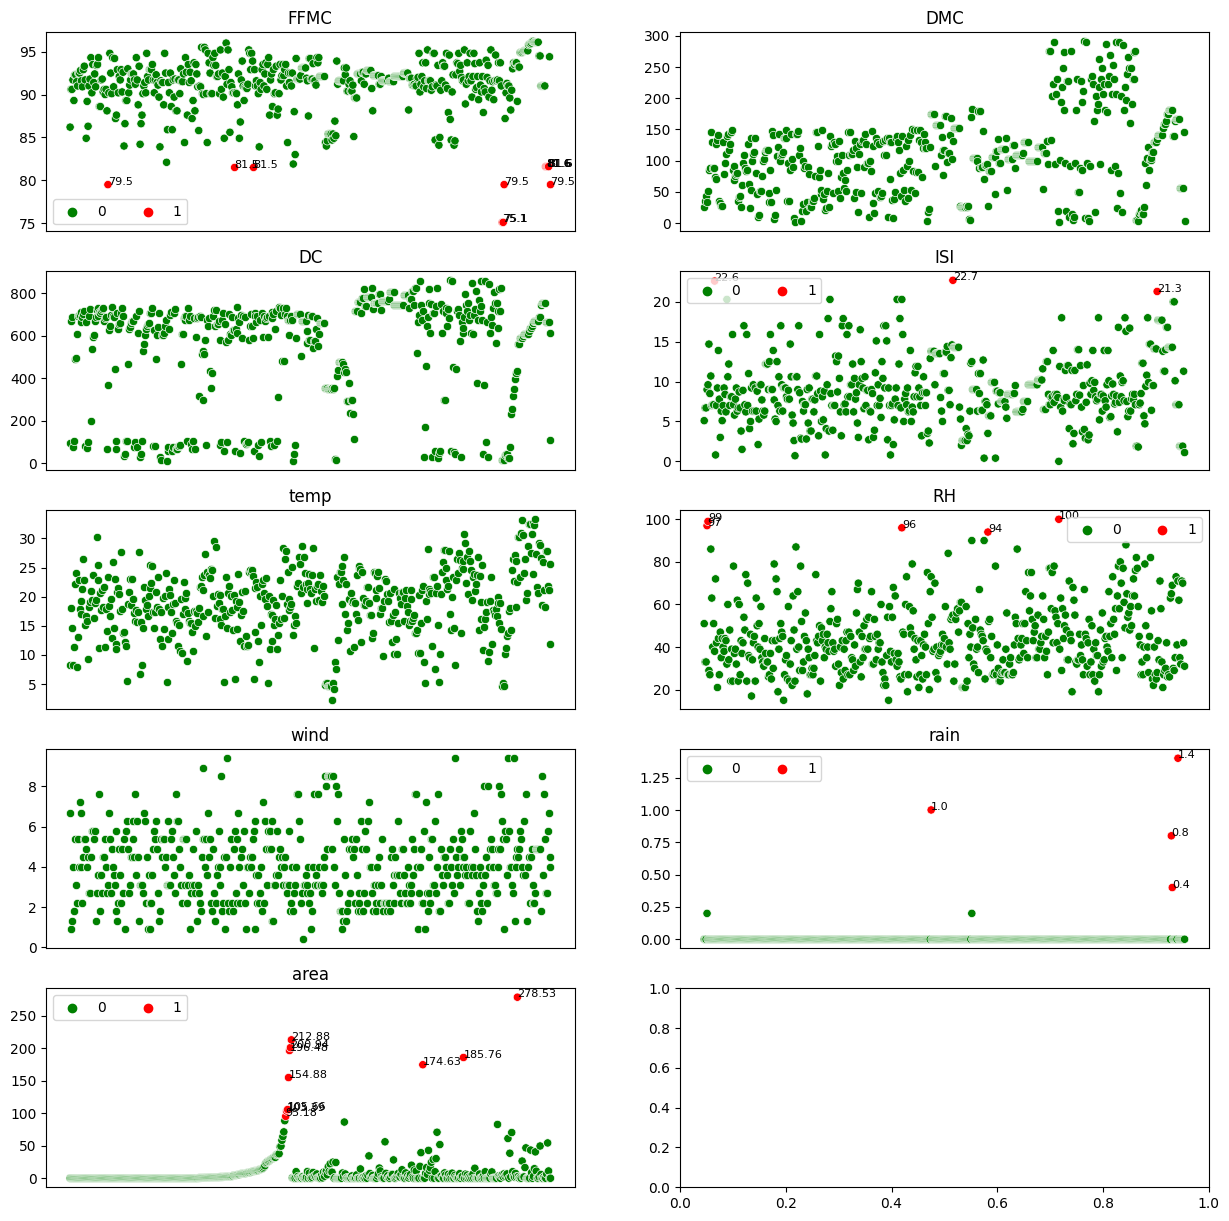

In [31]:
#FUNCTION TO DETECT OUTLIERS USING Z-SCORE METHOD
def zscore_outlier(x,lb,ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_
#PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
fig, ax = plt.subplots(5, 2, figsize=(15, 15))
row = col = 0
for n,i in enumerate(cont_df1.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(cont_df1[i], -3, 3)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(cont_df1[i])), y = cont_df1[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(cont_df1[i])), y = cont_df1[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(cont_df1[i]))[outliers == 1], cont_df1[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1

plt.show()


In [32]:
cont_df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [33]:
# Correlation matrix to check the multi collinearity of the features
cont_df1.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.495828,0.466397,0.703051,0.590872,-0.265945,-0.095487,0.048306,0.004128
DMC,0.495828,1.000000,0.681446,0.352731,0.470875,0.062772,-0.104563,0.081389,0.072340
DC,0.466397,0.681446,1.000000,0.290396,0.496608,-0.047971,-0.202856,0.043205,0.047989
ISI,0.703051,0.352731,0.290396,1.000000,0.436374,-0.152401,0.111548,0.052818,-0.025761
temp,0.590872,0.470875,0.496608,0.436374,1.000000,-0.532503,-0.227754,0.022257,0.069127
RH,-0.265945,0.062772,-0.047971,-0.152401,-0.532503,1.000000,0.070721,0.156128,-0.035342
wind,-0.095487,-0.104563,-0.202856,0.111548,-0.227754,0.070721,1.000000,0.131218,0.003597
rain,0.048306,0.081389,0.043205,0.052818,0.022257,0.156128,0.131218,1.000000,-0.028545
area,0.004128,0.072340,0.047989,-0.025761,0.069127,-0.035342,0.003597,-0.028545,1.000000


<AxesSubplot: >

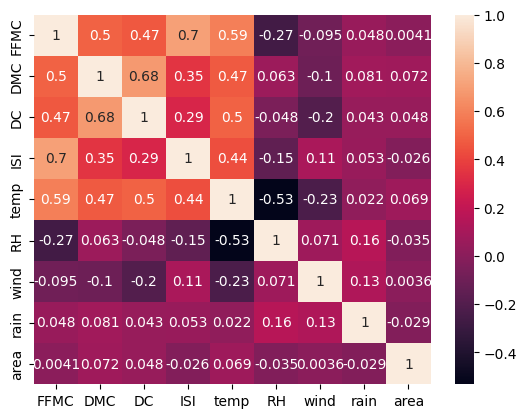

In [34]:
# Heatmaps for the given dataset.
sns.heatmap(cont_df1.corr(), annot=True)

### None of the value is near or equal to 1 or -1 for the continuous features. Hence no multicolinearity present.

In [35]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(cont_df1)  
print("VIF Results:")
print(vif_results)

VIF Results:
  feature        VIF
0    FFMC  64.404705
1     DMC   8.749747
2      DC  12.163154
3     ISI   8.031507
4    temp  31.537974
5      RH  14.079210
6    wind   6.853003
7    rain   1.073522
8    area   1.133730


### VIF value for all the features is very low. Hence all the variables are significant and there is no presence of multicollinearity.

### From both the correlation matrix and the VIF value show that none of the feature depend on each other. Hence there is no multicollinearity present in the dataset.

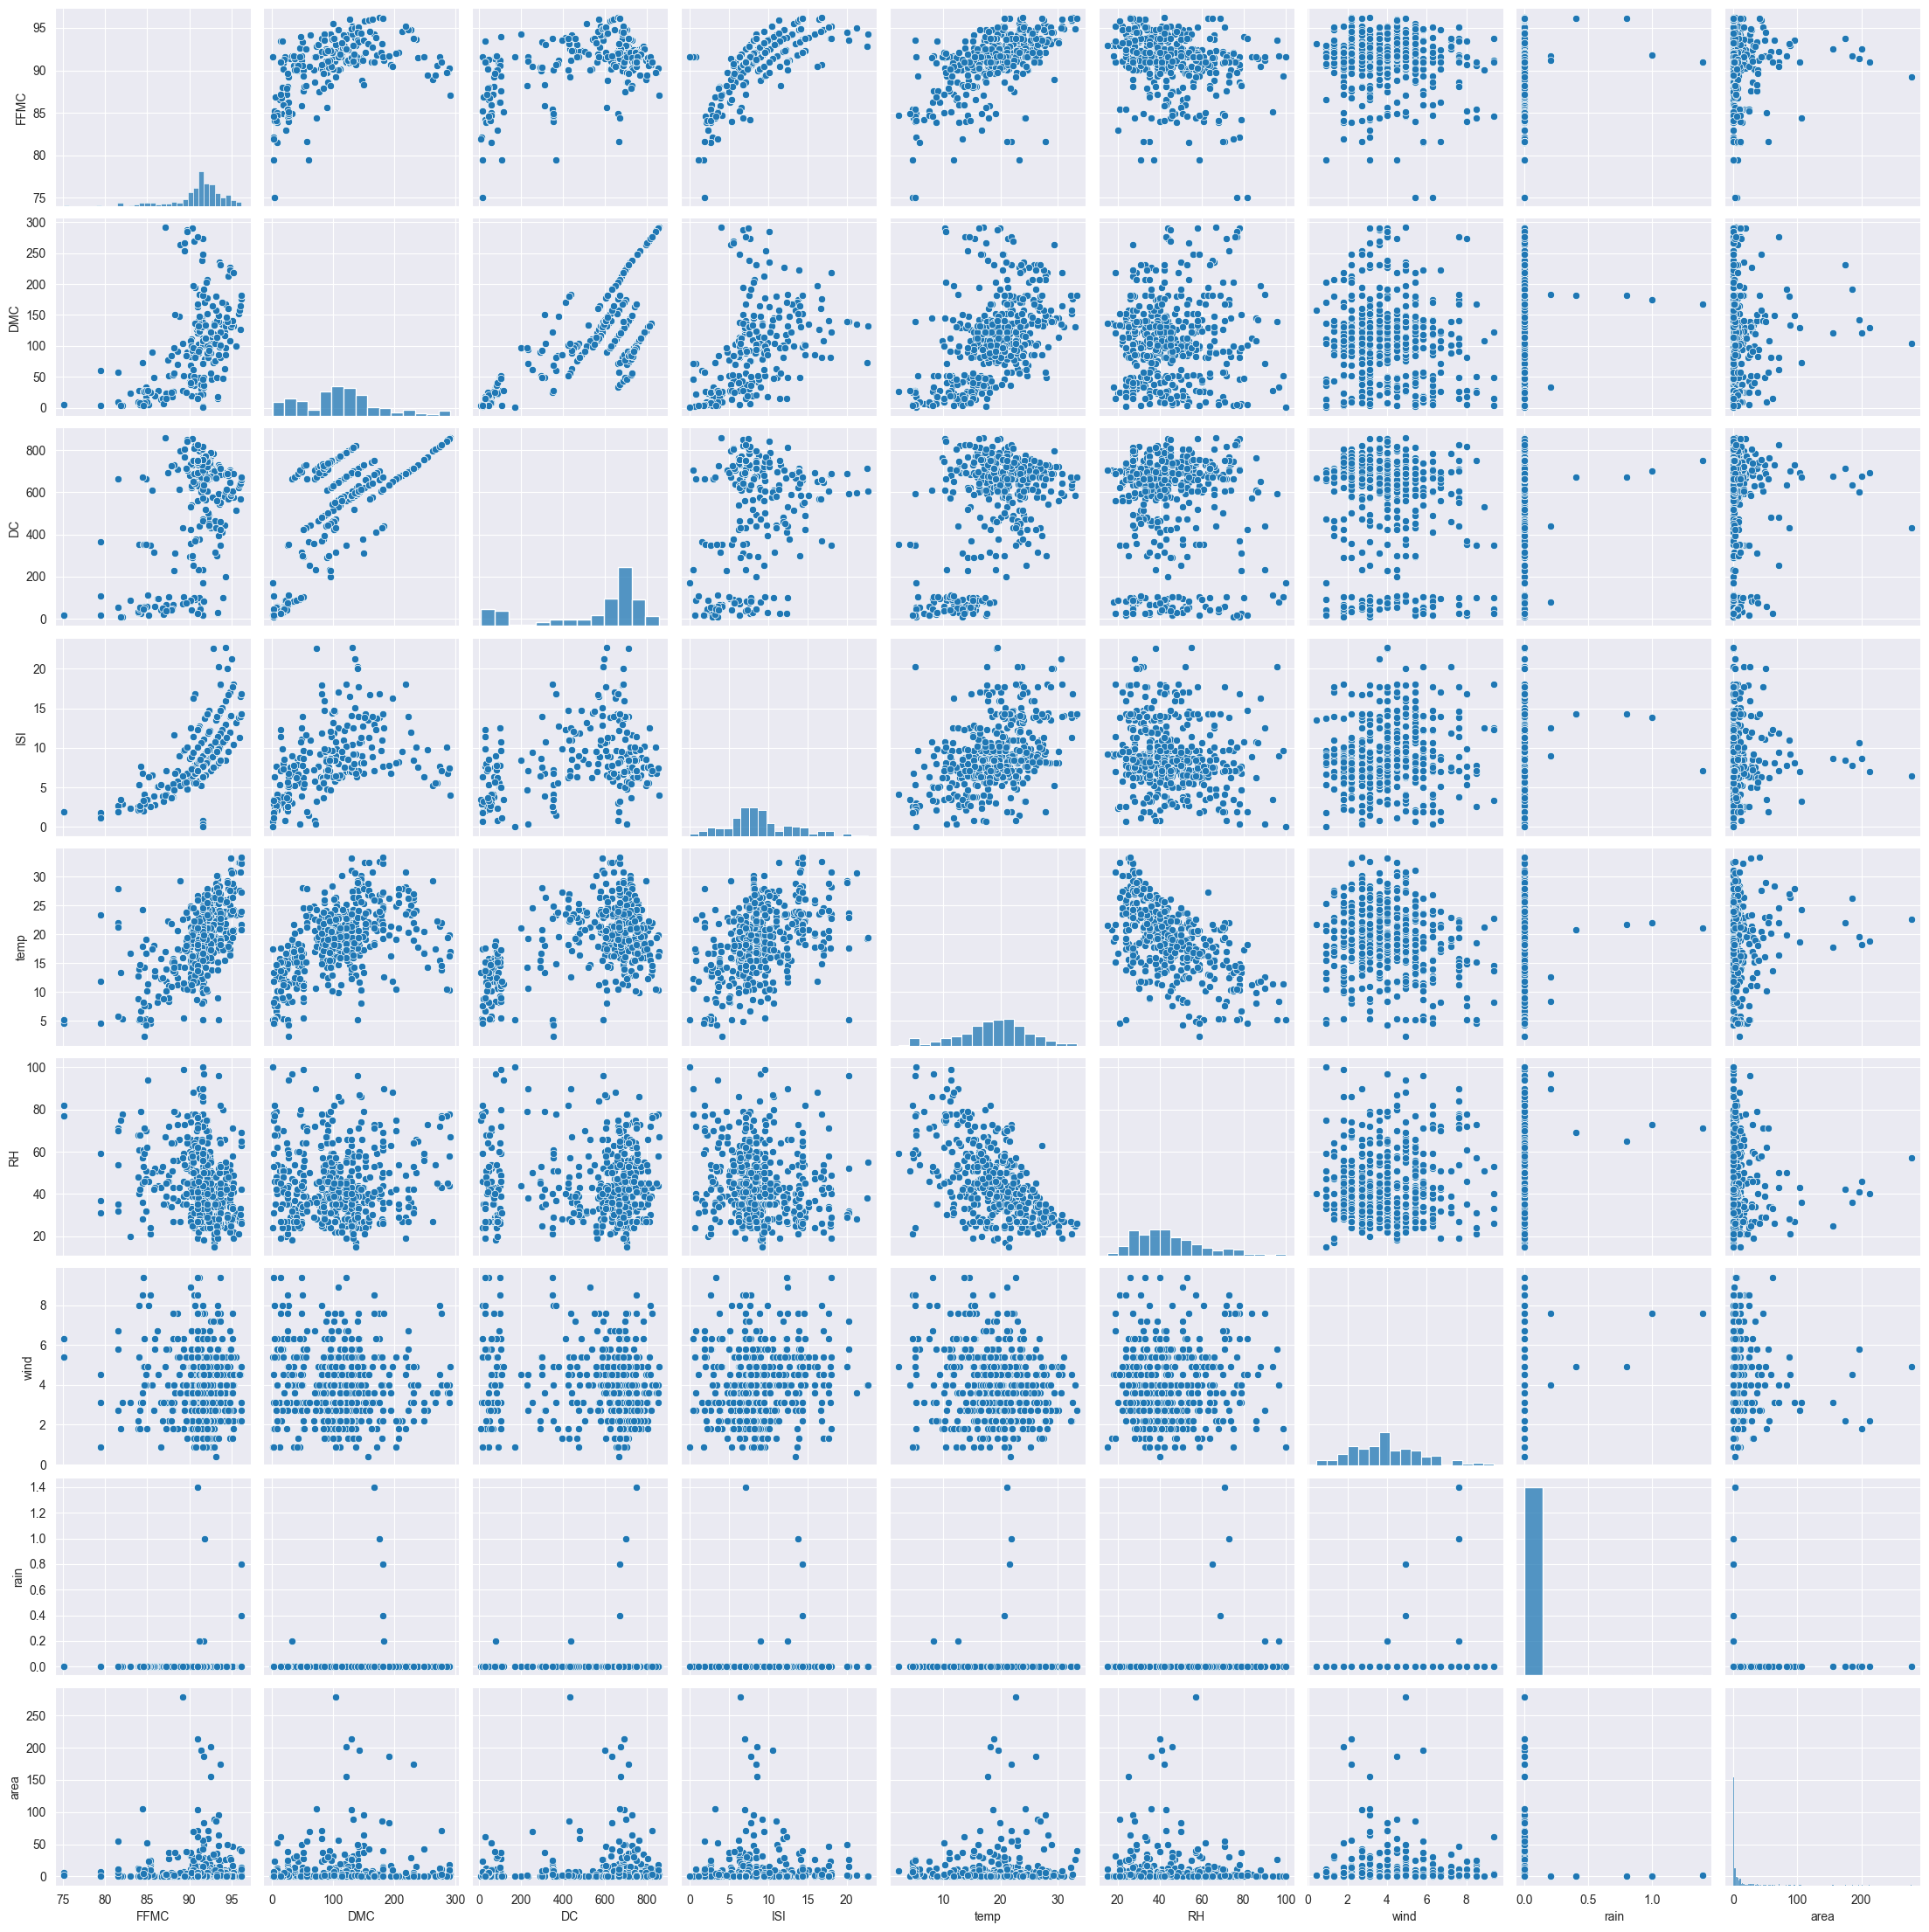

In [36]:
# Drawing Histogram to check the distribution of the data.
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cont_df1)

### Most of the histogram shows that the features are not normally distributed.

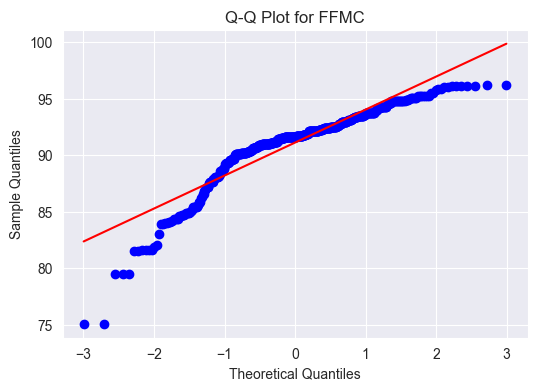

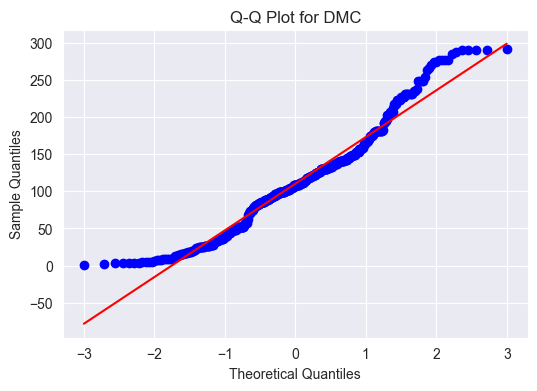

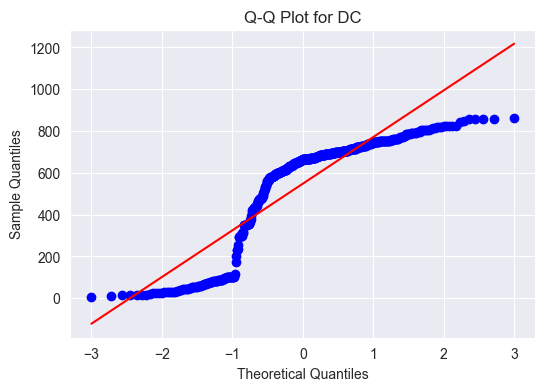

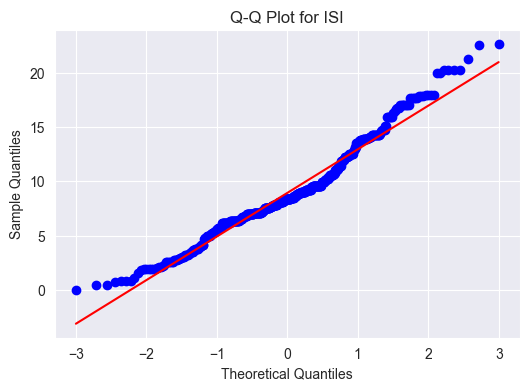

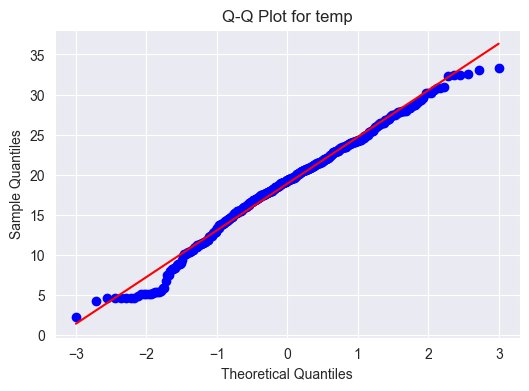

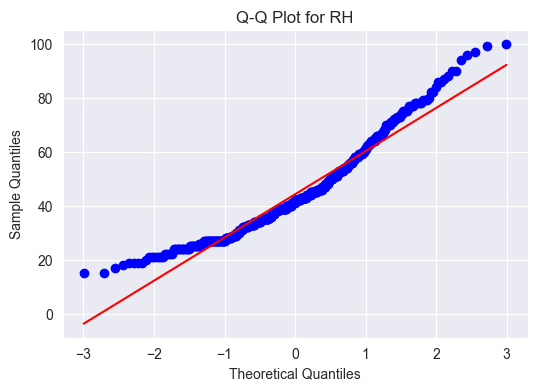

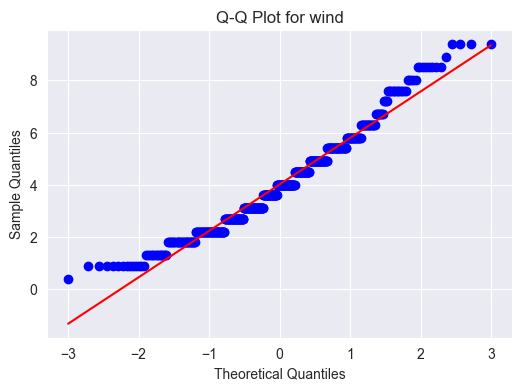

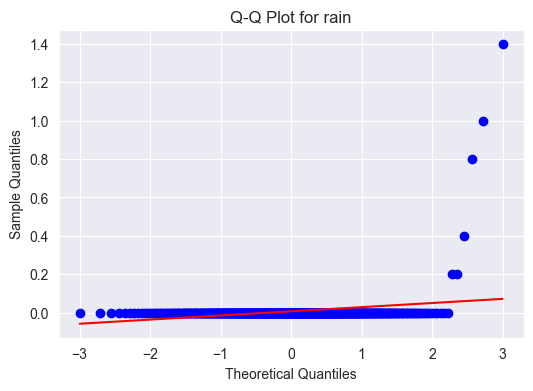

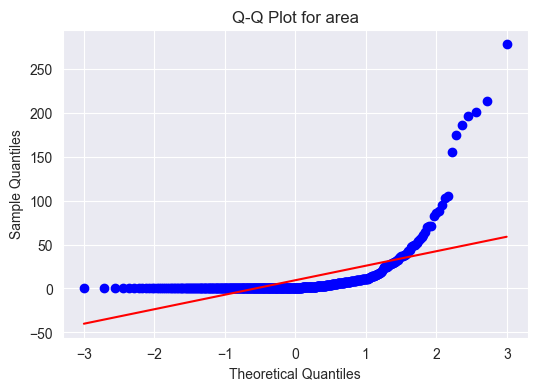

In [37]:
# Using Q-Q plot for checking the data distribution
# Create Q-Q plots for each variable in separate graphs
for col in cont_df1.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(cont_df1[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

### Most of the Q-Q plot shows that features are not normally distributed.

### Hence we can use Normalization for transformation.

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Normalization
min_max_scaler = MinMaxScaler()

# Fit and transform the data using standardization
normalized_data_minmax = min_max_scaler.fit_transform(cont_df1)


# Create a new DataFrame with the standardized data
norm_df = pd.DataFrame(normalized_data_minmax, columns = cont_df1.columns)

In [39]:
norm_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.526066,0.086492,0.101325,0.224670,0.192926,0.423529,0.700000,0.000000,0.000000
1,0.734597,0.118194,0.775419,0.295154,0.508039,0.211765,0.055556,0.000000,0.000000
2,0.734597,0.146795,0.796294,0.295154,0.398714,0.211765,0.100000,0.000000,0.000000
3,0.786730,0.110958,0.081623,0.396476,0.196141,0.964706,0.400000,0.142857,0.000000
4,0.672986,0.172984,0.110590,0.422907,0.295820,0.988235,0.155556,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
504,0.308057,0.191592,0.771315,0.083700,0.823151,0.200000,0.255556,0.000000,0.023121
505,0.308057,0.191592,0.771315,0.083700,0.633441,0.658824,0.600000,0.000000,0.194916
506,0.308057,0.191592,0.771315,0.083700,0.610932,0.647059,0.700000,0.000000,0.040067
507,0.914692,0.499311,0.711622,0.497797,0.752412,0.317647,0.400000,0.000000,0.000000


### Pre-processing of Training Categorical variable dataframe.

In [40]:
cat_df.head(5)

,dayfri,daymon,daysat,daysun,daythu,daytue,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,small
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [41]:
# Replace 'desired_columns' with a list of column names for which you want to find unique values
desired_columns = ["dayfri", "daymon","daysat","daysun","daythu","daytue","monthaug","monthdec","monthfeb","monthjan","monthjul","monthjun","monthmar","monthmay","monthnov","monthoct","monthsep","size_category"]

# Create an empty dictionary to store unique values for each column
unique_values_dict = {}

# Loop through the desired columns and find unique values for each
for column in desired_columns:
    unique_values = cat_df[column].unique()
    unique_values_dict[column] = unique_values


In [42]:
unique_values_dict

{'dayfri': array([1, 0], dtype=int64),
 'daymon': array([0, 1], dtype=int64),
 'daysat': array([0, 1], dtype=int64),
 'daysun': array([0, 1], dtype=int64),
 'daythu': array([0, 1], dtype=int64),
 'daytue': array([0, 1], dtype=int64),
 'monthaug': array([0, 1], dtype=int64),
 'monthdec': array([0, 1], dtype=int64),
 'monthfeb': array([0, 1], dtype=int64),
 'monthjan': array([0, 1], dtype=int64),
 'monthjul': array([0, 1], dtype=int64),
 'monthjun': array([0, 1], dtype=int64),
 'monthmar': array([1, 0], dtype=int64),
 'monthmay': array([0, 1], dtype=int64),
 'monthnov': array([0, 1], dtype=int64),
 'monthoct': array([0, 1], dtype=int64),
 'monthsep': array([0, 1], dtype=int64),
 'size_category': array(['small', 'large'], dtype=object)}

In [43]:
cat_df

,dayfri,daymon,daysat,daysun,daythu,daytue,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,small
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,large
505,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,large
506,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,large
507,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


### Applying Label encoder to size_category column as it has only two categories.

In [44]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the dataset
encoded_labels = encoder.fit_transform(cat_df["size_category"])

# Add encoded labels to the DataFrame
cat_df["size_category"] = encoded_labels

In [45]:
cat_df.head(2)

,dayfri,daymon,daysat,daysun,daythu,daytue,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


### Mearging training normalized continuous variable dataframe and encoded dataframe. 

In [46]:
# Concatenate the original DataFrame and the encoded DataFrame
norm_final_df = pd.concat([norm_df, cat_df], axis=1)

In [47]:
norm_final_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.526066,0.086492,0.101325,0.224670,0.192926,0.423529,0.700000,0.000000,0.000000,1,...,0,0,0,0,1,0,0,0,0,1
1,0.734597,0.118194,0.775419,0.295154,0.508039,0.211765,0.055556,0.000000,0.000000,0,...,0,0,0,0,0,0,0,1,0,1
2,0.734597,0.146795,0.796294,0.295154,0.398714,0.211765,0.100000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,1,0,1
3,0.786730,0.110958,0.081623,0.396476,0.196141,0.964706,0.400000,0.142857,0.000000,1,...,0,0,0,0,1,0,0,0,0,1
4,0.672986,0.172984,0.110590,0.422907,0.295820,0.988235,0.155556,0.000000,0.000000,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.308057,0.191592,0.771315,0.083700,0.823151,0.200000,0.255556,0.000000,0.023121,0,...,0,0,0,0,0,0,0,0,0,0
505,0.308057,0.191592,0.771315,0.083700,0.633441,0.658824,0.600000,0.000000,0.194916,0,...,0,0,0,0,0,0,0,0,0,0
506,0.308057,0.191592,0.771315,0.083700,0.610932,0.647059,0.700000,0.000000,0.040067,0,...,0,0,0,0,0,0,0,0,0,0
507,0.914692,0.499311,0.711622,0.497797,0.752412,0.317647,0.400000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,1


### Mearging original continuous variable dataframe and encoded dataframe.

In [48]:
# Concatenate the original DataFrame and the encoded DataFrame
org_final_df = pd.concat([cont_df1, cat_df], axis=1)

In [49]:
org_final_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


## Model building

In [52]:
# Importing train - test split , K-fold Cross validation and accuracy score and classification report 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate features (X) and target variable (y)
X = norm_final_df.drop('size_category', axis=1)
y = norm_final_df['size_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Define the neural network architecture
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),      # Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(32, activation='relu'),      # Another hidden layer with 32 neurons and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')     # Output layer with sigmoid activation for binary classification
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',   # Binary cross-entropy loss for binary classification
              metrics=['accuracy'])

# 4. Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 5. Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Epoch 1/10
11/11 [==============================] - 2s 23ms/step - loss: 0.8842 - accuracy: 0.3538 - val_loss: 0.7435 - val_accuracy: 0.5366
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5908 - val_loss: 0.6234 - val_accuracy: 0.7317
Epoch 3/10
11/11 [==============================] - 0s 6ms/step - loss: 0.6056 - accuracy: 0.7108 - val_loss: 0.5782 - val_accuracy: 0.7195
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 0.5593 - accuracy: 0.7292 - val_loss: 0.5529 - val_accuracy: 0.7439
Epoch 5/10
11/11 [==============================] - 0s 7ms/step - loss: 0.5266 - accuracy: 0.7569 - val_loss: 0.5238 - val_accuracy: 0.7683
Epoch 6/10
11/11 [==============================] - 0s 6ms/step - loss: 0.4977 - accuracy: 0.7815 - val_loss: 0.4982 - val_accuracy: 0.7927
Epoch 7/10
11/11 [==============================] - 0s 6ms/step - loss: 0.4726 - accuracy: 0.7938 - val_loss: 0.4798 - val_accuracy: 0.8171
Epoch 8/10
11/11 [=

### Confusion matrix for model accuracy. 

In [54]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[10 19]
 [ 1 72]]


### Classification report for model performance 

In [55]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.34      0.50        29
           1       0.79      0.99      0.88        73

    accuracy                           0.80       102
   macro avg       0.85      0.67      0.69       102
weighted avg       0.82      0.80      0.77       102



### ROC Curve for the model built using SVM and normaliazed dataset.

4/4 [==============================] - 0s 2ms/step


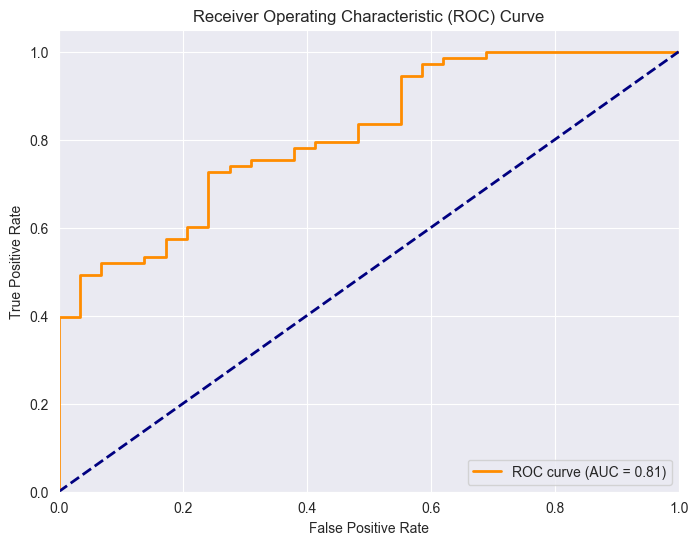

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Assuming you have already trained your model and have predictions for the test set in y_pred

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### The area under the curve is 0.81which is greater than 0.8 which concludes its a good classifier. Hence we can finalise the model.